## DataFrame
**series是处理一维数据，dataframe是处理二维数据。**

### #创建DataFrame：
**字典转DataFrames**

In [37]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

dict_data = {
'a' : [1, 2, 3, 4, 5],
'b' : ['L', 'K', 'J', 'M', 'Z'],
'c' : np.random.randn(5) }
print (dict_data)
frame_data = pd.DataFrame(dict_data, index=pd.date_range('20160101',periods=5))
print (frame_data)

{'a': [1, 2, 3, 4, 5], 'b': ['L', 'K', 'J', 'M', 'Z'], 'c': array([-0.88833596, -0.72783717,  0.88952117, -0.3023526 ,  0.85846931])}
            a  b         c
2016-01-01  1  L -0.888336
2016-01-02  2  K -0.727837
2016-01-03  3  J  0.889521
2016-01-04  4  M -0.302353
2016-01-05  5  Z  0.858469


In [38]:
dic = {}
dic['name'] = frame_data
print(dic)

{'name':             a  b         c
2016-01-01  1  L -0.888336
2016-01-02  2  K -0.727837
2016-01-03  3  J  0.889521
2016-01-04  4  M -0.302353
2016-01-05  5  Z  0.858469}


#Series组合成DataFrame的例子：

In [39]:
s_1 = pd.Series([2, 4, 6, 8, 10], name='APPL')
s_2 = pd.Series([1, 3, 5, 7, 9], name="GOOG")
numbers = pd.concat([s_1, s_2], axis=1)
print (numbers)
print (type(numbers))

   APPL  GOOG
0     2     1
1     4     3
2     6     5
3     8     7
4    10     9
<class 'pandas.core.frame.DataFrame'>


直接创建

In [40]:
df = pd.DataFrame(np.random.randn(5,2),index=range(0,10,2),columns=list('AB'))
print(df)

          A         B
0  0.489245  0.330633
2  1.022834 -1.053273
4 -0.841257  0.036925
6 -2.279588 -0.144248
8 -0.791372  1.431749


### 修改dataframes的列名、索引；读取dataframes的值：

In [41]:
print (numbers.columns)
# 修改列名
numbers.columns = ['MSFT', 'YHOO']
print (numbers)

Index(['APPL', 'GOOG'], dtype='object')
   MSFT  YHOO
0     2     1
1     4     3
2     6     5
3     8     7
4    10     9


In [42]:
print (numbers.index)
# 修改索引
numbers.index = pd.date_range("20160101",periods=len(numbers))
print (numbers)
# 读取Dataframe的值
print (numbers.values)

RangeIndex(start=0, stop=5, step=1)
            MSFT  YHOO
2016-01-01     2     1
2016-01-02     4     3
2016-01-03     6     5
2016-01-04     8     7
2016-01-05    10     9
[[ 2  1]
 [ 4  3]
 [ 6  5]
 [ 8  7]
 [10  9]]


In [43]:
numbers.iloc[2,1]

5

## #
## loc works on labels in the index.
## iloc works on the positions in the index (so it only takes integers). 

In [44]:
df = pd.DataFrame(np.random.randn(5,2),index=range(0,10,2),columns=list('AB'))

In [45]:
df

,A,B
0,0.828127,0.093937
2,0.546738,-0.549351
4,-1.252600,0.115887
6,-0.752436,0.255062
8,0.122848,0.682545


In [46]:
df.iloc[[2]]

,A,B
4,-1.2526,0.115887


In [47]:
df.loc[[2]]

,A,B
2,0.546738,-0.549351


## ix

In [48]:
data = pd.DataFrame({'A':[1,2,3],'B':[4,5,6],'C':[7,8,9]},index=["a","b","c"])
print(data)

   A  B  C
a  1  4  7
b  2  5  8
c  3  6  9


In [49]:
data.loc["b","B"]

5

In [50]:
data.iloc[1,1]

5

In [51]:
data.loc['b':'c','B':'C']

,B,C
b,5,8
c,6,9


In [52]:
data.iloc[1:3,1:3]

,B,C
b,5,8
c,6,9


In [53]:
print(data.ix[1,1])
print(data.ix["b","B"])

5
5


In [54]:
print(data.ix[1:3,1:3])
print(data.ix['b':'c','B':'C'])

   B  C
b  5  8
c  6  9
   B  C
b  5  8
c  6  9


### #课堂练习题 ：访问DataFrame元素
**读取excel里面的 600036,600050,601318三只股票的数据，然后做成dataframe，最后通过loc与iloc读取需要的数据**

**1.使用for循环语句读取三只股票数据的收盘价，以字典的形式保存（key为股票代码，value为收盘价），再转换为dataframe**

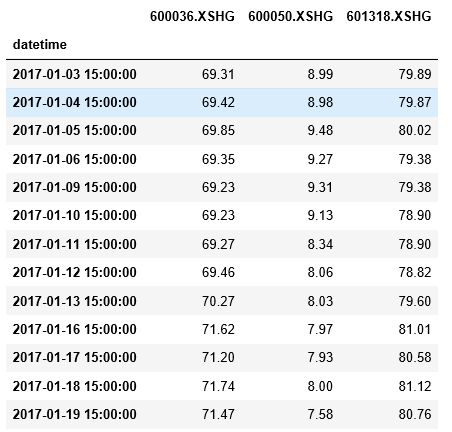

**2.分别使用 iloc 和 loc 选取600036和600050这两只股票从 2017年1月1日 到 2017年1月10日 的数据**

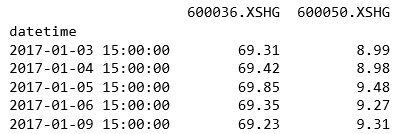

**3.使用 iloc 选取600036和600050这两只股票前20行的奇数行的数据**

（1,3,5,7,9,11,13,15,17,19）

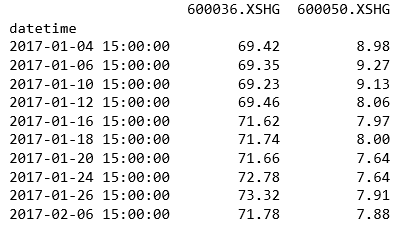

In [55]:
stock1 = pd.read_excel('sz50.xlsx',sheetname='600036.XSHG', index_col='datetime')
stock2 = pd.read_excel('sz50.xlsx',sheetname='600050.XSHG', index_col='datetime')
stock3 = pd.read_excel('sz50.xlsx',sheetname='601318.XSHG', index_col='datetime')
symbol=['600036.XSHG','600050.XSHG','601318.XSHG']
data_dict = {}
for s in symbol:
    data =  pd.read_excel('sz50.xlsx',sheetname=s, index_col='datetime')
    data_dict[s] = data['close']
data = pd.DataFrame(data_dict)
print(data)

                     600036.XSHG  600050.XSHG  601318.XSHG
datetime                                                  
2017-01-03 15:00:00        69.31         8.99        79.89
2017-01-04 15:00:00        69.42         8.98        79.87
2017-01-05 15:00:00        69.85         9.48        80.02
2017-01-06 15:00:00        69.35         9.27        79.38
2017-01-09 15:00:00        69.23         9.31        79.38
2017-01-10 15:00:00        69.23         9.13        78.90
2017-01-11 15:00:00        69.27         8.34        78.90
2017-01-12 15:00:00        69.46         8.06        78.82
2017-01-13 15:00:00        70.27         8.03        79.60
2017-01-16 15:00:00        71.62         7.97        81.01
2017-01-17 15:00:00        71.20         7.93        80.58
2017-01-18 15:00:00        71.74         8.00        81.12
2017-01-19 15:00:00        71.47         7.58        80.76
2017-01-20 15:00:00        71.66         7.64        81.21
2017-01-23 15:00:00        71.39         7.68        81.

### 布尔索引

与Series一样,有时候我们想过滤DataFrame根据一组标准。我们通过索引DataFrame布尔值。

In [56]:
print(data.loc[data['600036.XSHG'].pct_change() > data['601318.XSHG'].pct_change()].head())

                     600036.XSHG  600050.XSHG  601318.XSHG
datetime                                                  
2017-01-04 15:00:00        69.42         8.98        79.87
2017-01-05 15:00:00        69.85         9.48        80.02
2017-01-06 15:00:00        69.35         9.27        79.38
2017-01-10 15:00:00        69.23         9.13        78.90
2017-01-11 15:00:00        69.27         8.34        78.90


### 添加、删除列,结合DataFrames /Series

当你已经有一个DataFrame的数据,这很好,但同样重要的是能够增加你的数据

**添加新数据**

In [57]:
new = pd.read_excel('sz50.xlsx',sheetname='600519.XSHG', index_col='datetime')
data['600519.XSHG'] = new.close
print(data.head(5))

                     600036.XSHG  600050.XSHG  601318.XSHG  600519.XSHG
datetime                                                               
2017-01-03 15:00:00        69.31         8.99        79.89      2078.80
2017-01-04 15:00:00        69.42         8.98        79.87      2186.35
2017-01-05 15:00:00        69.85         9.48        80.02      2155.78
2017-01-06 15:00:00        69.35         9.27        79.38      2180.14
2017-01-09 15:00:00        69.23         9.31        79.38      2165.23


**删除某一列**

In [58]:
data = data.drop('600050.XSHG', axis=1)
print(data.head(5))
type(data)

                     600036.XSHG  601318.XSHG  600519.XSHG
datetime                                                  
2017-01-03 15:00:00        69.31        79.89      2078.80
2017-01-04 15:00:00        69.42        79.87      2186.35
2017-01-05 15:00:00        69.85        80.02      2155.78
2017-01-06 15:00:00        69.35        79.38      2180.14
2017-01-09 15:00:00        69.23        79.38      2165.23


pandas.core.frame.DataFrame

**合并某一列**

In [59]:
gold_stock = pd.read_excel('sz50.xlsx',sheetname='600547.XSHG', index_col='datetime')

df=pd.concat([data,gold_stock['close']], axis=1)
print(df.head(5))

                     600036.XSHG  601318.XSHG  600519.XSHG   close
datetime                                                          
2017-01-03 15:00:00        69.31        79.89      2078.80  323.38
2017-01-04 15:00:00        69.42        79.87      2186.35  324.61
2017-01-05 15:00:00        69.85        80.02      2155.78  330.94
2017-01-06 15:00:00        69.35        79.38      2180.14  327.69
2017-01-09 15:00:00        69.23        79.38      2165.23  323.46


In [60]:
df.rename(columns={'close':'600547.XSHG'}, inplace = True)

In [61]:
print(df.head(5))

                     600036.XSHG  601318.XSHG  600519.XSHG  600547.XSHG
datetime                                                               
2017-01-03 15:00:00        69.31        79.89      2078.80       323.38
2017-01-04 15:00:00        69.42        79.87      2186.35       324.61
2017-01-05 15:00:00        69.85        80.02      2155.78       330.94
2017-01-06 15:00:00        69.35        79.38      2180.14       327.69
2017-01-09 15:00:00        69.23        79.38      2165.23       323.46


### 缺失的数据(再一次)

把一个真实数据输入DataFrame带给我们与在系列中同样的问题,只是这次更多的维度。我们有和系列相同的方法来访问,如下显示。

In [62]:
print(df[df.isnull().values==True])

                     600036.XSHG  601318.XSHG  600519.XSHG  600547.XSHG
datetime                                                               
2017-04-06 15:00:00        73.44        82.76      2435.12          NaN
2017-04-07 15:00:00        72.97        81.97      2441.39          NaN
2017-04-10 15:00:00        73.01        81.61      2417.22          NaN
2017-04-11 15:00:00        73.36        81.03      2394.98          NaN
2017-04-12 15:00:00        73.51        80.63      2424.62          NaN
2017-04-13 15:00:00        73.01        80.43      2476.43          NaN
2017-04-14 15:00:00        72.63        80.38      2456.92          NaN
2017-04-17 15:00:00        72.90        80.67      2459.84          NaN
2017-04-18 15:00:00        71.78        79.96      2511.41          NaN
2017-04-19 15:00:00        71.31        79.51      2521.23          NaN
2017-04-20 15:00:00        70.93        80.18      2580.63          NaN
2017-04-21 15:00:00        72.51        80.79      2492.65      

In [63]:
df_na = df.fillna(method='ffill')

In [64]:
print(df_na.loc['2017-04-26':'2017-05-17'])

                     600036.XSHG  601318.XSHG  600519.XSHG  600547.XSHG
datetime                                                               
2017-04-26 15:00:00        73.71        84.01      2597.03       317.66
2017-04-27 15:00:00        73.24        84.71      2621.69       317.66
2017-04-28 15:00:00        73.78        85.00      2565.84       317.66
2017-05-02 15:00:00        73.36        84.93      2559.81       317.66
2017-05-03 15:00:00        73.05        85.11      2594.92       317.66
2017-05-04 15:00:00        72.36        84.68      2585.10       317.66
2017-05-05 15:00:00        72.51        83.41      2586.47       317.66
2017-05-08 15:00:00        72.51        84.59      2516.57       317.66
2017-05-09 15:00:00        72.47        85.11      2541.11       317.66
2017-05-10 15:00:00        73.40        89.36      2547.88       317.66
2017-05-11 15:00:00        74.33        89.07      2560.74       317.66
2017-05-12 15:00:00        78.49        91.72      2568.88      

### 时间序列分析

使用安装在内部的统计方法来计算DataFrames,我们可以对多个时间序列进行计算。执行计算的代码在DataFrames与在series上几乎一模一样,所以不要担心再学习一切。

**将DataFrame数据可视化**

<Figure size 1080x504 with 0 Axes>

Text(0.5,1,'Onebegin Stock Prices')

Text(0,0.5,'Price')

Text(0.5,0,'Date')

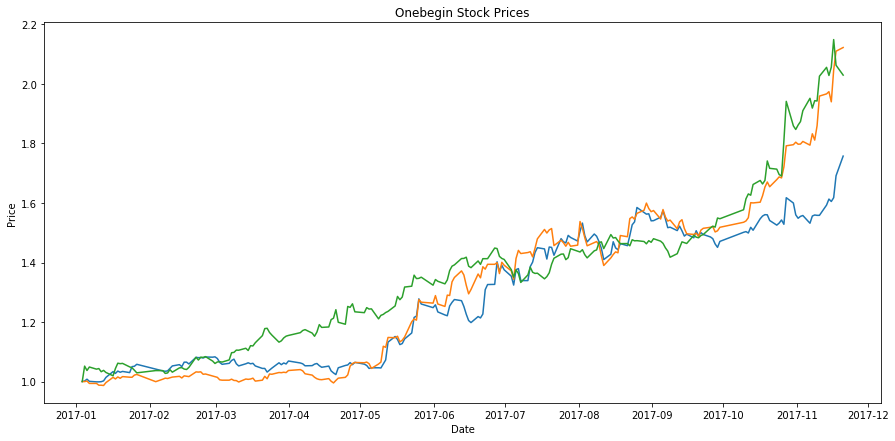

In [65]:
import matplotlib.pyplot as plt

onebegin=data/data.iloc[0]

plt.figure(figsize=(15, 7))
plt.plot(onebegin)
plt.title("Onebegin Stock Prices")
plt.ylabel("Price")
plt.xlabel("Date")
plt.show()

**对dataframe数据进行计算**

In [66]:
print('mean:','\n',data.mean(axis=0))
print('std:','\n',data.std(axis=0))
print(data.describe())
print(onebegin.head(5))

mean: 
 600036.XSHG      88.889860
601318.XSHG     104.962372
600519.XSHG    2823.996047
dtype: float64
std: 
 600036.XSHG     15.039725
601318.XSHG     22.705049
600519.XSHG    532.922368
dtype: float64
       600036.XSHG  601318.XSHG  600519.XSHG
count   215.000000   215.000000   215.000000
mean     88.889860   104.962372  2823.996047
std      15.039725    22.705049   532.922368
min      69.230000    78.820000  2078.800000
25%      73.380000    81.390000  2397.590000
50%      87.370000   107.730000  2834.120000
75%     103.450000   120.980000  3053.000000
max     121.820000   169.570000  4467.820000
                     600036.XSHG  601318.XSHG  600519.XSHG
datetime                                                  
2017-01-03 15:00:00     1.000000     1.000000     1.000000
2017-01-04 15:00:00     1.001587     0.999750     1.051737
2017-01-05 15:00:00     1.007791     1.001627     1.037031
2017-01-06 15:00:00     1.000577     0.993616     1.048749
2017-01-09 15:00:00     0.998846     

**将回报率标准化，然后可视化**

In [67]:
mult_returns = data.pct_change()[1:]
print(mult_returns.head(5))

                     600036.XSHG  601318.XSHG  600519.XSHG
datetime                                                  
2017-01-04 15:00:00     0.001587    -0.000250     0.051737
2017-01-05 15:00:00     0.006194     0.001878    -0.013982
2017-01-06 15:00:00    -0.007158    -0.007998     0.011300
2017-01-09 15:00:00    -0.001730     0.000000    -0.006839
2017-01-10 15:00:00     0.000000    -0.006047     0.001894


In [68]:
mult_returns.mean(axis=0)

600036.XSHG    0.002761
601318.XSHG    0.003644
600519.XSHG    0.003435
dtype: float64

<Figure size 1080x504 with 0 Axes>

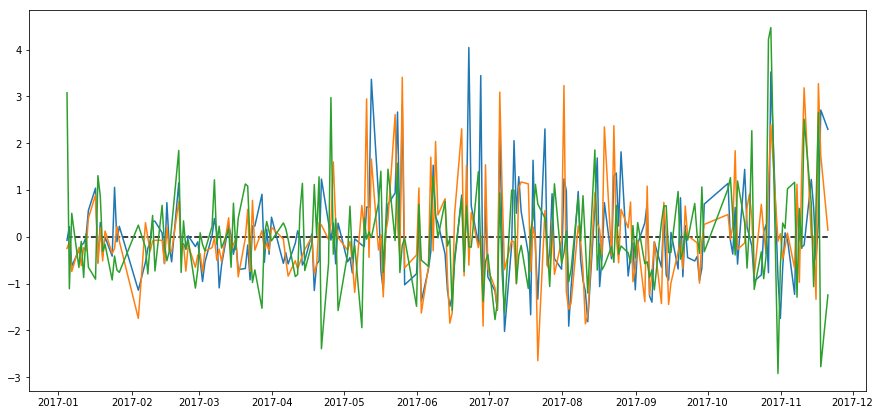

In [69]:
norm_returns = (mult_returns-mult_returns.mean(axis=0))/mult_returns.std(axis=0)

plt.figure(figsize=(15, 7))
plt.plot(norm_returns)
plt.hlines(0, norm_returns.index[0],norm_returns.index[-1], linestyles='dashed')
plt.show()

将dataframe里的数据计算40均线，最后可视化展示出来：

<Figure size 1080x504 with 0 Axes>

Text(0.5,1,'40days Rolling Mean of 601318.XSHG')

Text(0.5,0,'Date')

Text(0,0.5,'Price')

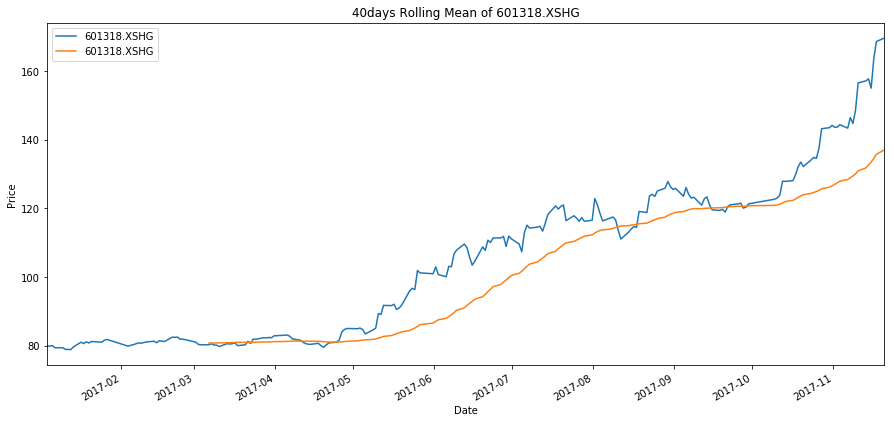

In [70]:
rolling_mean = data['601318.XSHG'].rolling(window=40,center=False).mean()

plt.figure(figsize=(15, 7))
data['601318.XSHG'].plot()
rolling_mean.plot()
plt.title("40days Rolling Mean of 601318.XSHG")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()